In [1]:
import random as rand
from math import sqrt
import numpy as np
import pandas as pd

In [2]:
nusers = 100
nitems = 100
k = 10

pu = np.random.rand(k,1)

Q = np.random.rand(nitems,k)
nQ = np.dot(Q,Q.T)

ru = np.dot(Q,pu)
D = (np.diag(nQ) + np.diag(nQ.T) - 2*nQ)
nitems = len(ru)
ntrans=200
state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
action = np.ceil(np.random.rand(ntrans,1)*nitems).astype(int)
next_state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
for i in range(0, len(state)):
    next_state[i][0]=state[i][1]
    next_state[i][1]=action[i][0]


In [3]:
act = np.ceil(np.random.rand(ntrans,1)*nitems).astype(int)

In [4]:
len(ru)

100

In [5]:
dataset = pd.DataFrame({'state': list(state), 'action': list(action), 'next_state': list(next_state)}, columns=['state', 'action', 'next_state'])

In [6]:
dataset

,state,action,next_state
0,"[58, 43]",[19],"[43, 19]"
1,"[60, 34]",[64],"[34, 64]"
2,"[21, 78]",[37],"[78, 37]"
3,"[33, 51]",[17],"[51, 17]"
4,"[47, 70]",[38],"[70, 38]"
...,...,...,...
195,"[29, 61]",[73],"[61, 73]"
196,"[48, 80]",[98],"[80, 98]"
197,"[79, 23]",[1],"[23, 1]"
198,"[100, 12]",[86],"[12, 86]"


In [7]:
def getReward1(ru, D, state, action):
    nitems = len(ru)
    dist = D.flatten()
    try:
        reward = ru[action][0]
        for i in range(0, len(state)):
            if state[i]==-1:
                break
            else:
                reward += (1/((len(state)-i)+1)) * dist[(state[i])*nitems + action] 
    except IndexError:
        reward = 0
    return reward

In [8]:
def getReward(ru, D, state, action):
    nitems = len(ru)
    dist = D.flatten()
    try:
        reward = ru[action][0] +  dist[(state[0])*nitems + action] + dist[(state[1])*nitems + action]
    except IndexError:
        reward = 1.5
    return reward

In [9]:
reward=[]
for i in range(0,len(state)):
    reward.append(getReward(ru, D, state[i],action[i]))

#reward = ru[action[0]][0] + DD[(state[1])*nitems + action[0]]
    

In [10]:
dataset["reward"]=reward

In [11]:
dataset

,state,action,next_state,reward
0,"[58, 43]",[19],"[43, 19]",[2.544252429670139]
1,"[60, 34]",[64],"[34, 64]",[11.370304021007444]
2,"[21, 78]",[37],"[78, 37]",[5.667940934231813]
3,"[33, 51]",[17],"[51, 17]",[2.956446823175522]
4,"[47, 70]",[38],"[70, 38]",[7.160635379876405]
...,...,...,...,...
195,"[29, 61]",[73],"[61, 73]",[7.825356193400408]
196,"[48, 80]",[98],"[80, 98]",[2.528101693363611]
197,"[79, 23]",[1],"[23, 1]",[5.1560354212800785]
198,"[100, 12]",[86],"[12, 86]",1.5


In [12]:
from gym import Env
from gym.spaces import Discrete, Box
from numpy import int64

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from gym.spaces import Box, Discrete
from tqdm import tqdm

  
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

2023-02-02 13:51:39.511371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 13:51:39.656476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-02 13:51:39.656513: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-02 13:51:40.544679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.

In [13]:
a=Box(low=0, high=99, shape=(1,2), dtype=int64)
k=a.sample()
print(k.shape)


(1, 2)


In [14]:
observation_space = Box(low=0, high=99, shape=(1,2), dtype=int64)
a=observation_space.sample().ravel()
print(a)
action=89
a=np.append(a, action)
a[2]
if action in a:
    print("Asr")
else:
    print("as")

[31 43]
Asr


In [15]:
class CustomEnv1(Env):
    def __init__(self):
        self.i=0
        self.action_space = Discrete(100)
        self.observation_space = Box(low=0, high=99, shape=(1,10), dtype=int64)
        self.state = self.observation_space.sample().ravel()
        
    def step(self,action):
        self.i+=1 
        for j in range(self.i,10):
            self.state[j]=-1
        
        self.next_state = self.observation_space.sample().ravel()
        #self.next_state[0] = self.state[1]
        #self.next_state[1]= action
        
        if action in self.state:
            self.state[self.i]=action
            reward = -10
        else:  
            self.state[self.i]=action 
            reward= getReward1(ru, D, self.state, action)
        
        if self.i==9:
            print(self.state)
            done=True
        else:
            done=False
        info={}

        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.i=0
        self.state = self.observation_space.sample().ravel()
        return self.state

In [16]:
class CustomEnv(Env):
    def __init__(self):
        self.i=0
        self.action_space = Discrete(100)
        self.observation_space = Box(low=0, high=99, shape=(1,2), dtype=int64)
        self.state = self.observation_space.sample().ravel()
        self.a=self.state
        
    def step(self,action):
        self.i+=1
        self.next_state = self.observation_space.sample().ravel()
        self.next_state[0] = self.state[1]
        self.next_state[1]= action
        #print(self.next_state)
        if action in self.a:
            reward=-100
        else:
            reward= getReward(ru, D, self.state, action)
        self.state=self.next_state
        self.a=np.append(self.a,action)
        if self.i==12:
            print(self.a)
            done=True
        else:
            done=False
        info={}

        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.a=[]
        self.i=0
        self.state = self.observation_space.sample().ravel()
        return self.state

In [17]:
env = CustomEnv1()

In [18]:
a=env.observation_space.sample().ravel()

print(a)
a[0]

[15 72 72  1 32 34 16 75  4 34]


15

In [19]:
episodes = 10 #20 shower episodes
for episode in tqdm(range(1, episodes+1)):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

100%|██████████| 10/10 [00:00<00:00, 630.38it/s]

[31 47 31 74 67 34 33 67 13 21]
Episode:1 Score:7.243799608790377
[26 80 93 31 49 66 39 85 78 38]
Episode:2 Score:35.30539679313147
[24 23 52 47 28 80 74 24 48 77]
Episode:3 Score:23.902502902833092
[51 16 47 75 61 82 51 77 81 93]
Episode:4 Score:24.117777938949946
[96 95 15 74 45 51 58 70 14 97]
Episode:5 Score:34.165801945607484
[88  0 17 45 41  0 86  3 14 44]
Episode:6 Score:18.94605002413871
[28 86 56 86 17 66 48 39 10 80]
Episode:7 Score:27.119142934841843
[26 93 56 50 21 56 19 75 72 15]
Episode:8 Score:16.212557601900638
[38 92 22 70 63 30 86 27 84 51]
Episode:9 Score:33.683252979291936
[42 13 68 14 68 73 36 30 62 55]
Episode:10 Score:22.023832055579646


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#from tensorflow.keras.optimizers import Adam

In [21]:
states = np.shape(env.observation_space)
actions = env.action_space.n

In [22]:
states

(1, 10)

In [23]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [24]:
model = build_model(states, actions)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 24)             264       
                                                                 
 dense_1 (Dense)             (None, 1, 24)             600       
                                                                 
 dense_2 (Dense)             (None, 1, 24)             600       
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 100)               2500      
                                                                 
Total params: 3,964
Trainable params: 3,964
Non-trainable params: 0
_________________________________________________________________


In [26]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2, gamma=0.9)
    return dqn

In [27]:

#Adam._name = 'hey'

In [28]:

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-2), metrics=['mae'])
history=dqn.fit(env, nb_steps=10001, visualize=False, verbose=2, action_repetition=1)

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-02-02 13:51:44.977032: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-02 13:51:44.977148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-02 13:51:44.977242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could n

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training for 10001 steps ...


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-02-02 13:51:45.677186: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_3/BiasAdd' id:159 op device:{requested: '', assigned: ''} def:{{{node dense_3/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_3/MatMul, dense_3/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-02-02 13:51:45.703796: W tensorflow/c/c_api.cc:291] Operation '{name:'count_3/Assign' id:505 op device:{requested: '', assigned: ''} def:{{{node count_3/Assign}} = AssignVariableOp[_has_manual_co

[76 72 32 32 32 32 72 32 33 33]
     9/10001: episode: 1, duration: 0.106s, episode steps:   9, steps per second:  85, episode reward: -44.667, mean reward: -4.963 [-10.000, 10.667], mean action: 41.111 [32.000, 72.000],  loss: --, mae: --, mean_q: --


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-02-02 13:51:45.780618: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_3_1/BiasAdd' id:317 op device:{requested: '', assigned: ''} def

[68 72 32 32 73 38 16 38 38 16]
    18/10001: episode: 2, duration: 0.748s, episode steps:   9, steps per second:  12, episode reward: -22.881, mean reward: -2.542 [-10.000,  4.977], mean action: 39.444 [16.000, 73.000],  loss: 47.455552, mae: 2.785034, mean_q: 9.007038
[ 9 16 73 17 77 94 80 33 73 44]
    27/10001: episode: 3, duration: 0.059s, episode steps:   9, steps per second: 151, episode reward: 24.335, mean reward:  2.704 [-10.000,  8.218], mean action: 56.333 [16.000, 94.000],  loss: 35.179802, mae: 2.407600, mean_q: 8.134888
[63 33 73 73 73 77 73 16 75 77]
    36/10001: episode: 4, duration: 0.059s, episode steps:   9, steps per second: 153, episode reward: -22.060, mean reward: -2.451 [-10.000,  4.375], mean action: 63.333 [16.000, 77.000],  loss: 20.268673, mae: 3.519451, mean_q: 12.593787
[77 77 73 77 17 77 77 75 53 80]
    45/10001: episode: 5, duration: 0.061s, episode steps:   9, steps per second: 148, episode reward: -16.992, mean reward: -1.888 [-10.000,  7.457], mean

In [29]:
# dqn.save_weights('models/dqn_0.h5')

In [30]:
a=[[ np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100), -1, -1, -1, -1, -1, -1]]
a=[[ np.random.randint(0,100), np.random.randint(0,100), -1, -1, -1, -1, -1, -1, -1, -1]]
t=0
idx=2
test= [[88, 41, 49, 42, 69, 43, 81, 6, 20, -1]]

test_reward=dqn.compute_q_values(test)
max_v=max(test_reward)
print(test_reward)
rrr=test_reward.tolist()
index = rrr.index(max_v)
print(index)
rrr[index]=-100
max_v=max(rrr)
print(rrr.index(max_v))
reward=[]

for i in range(idx,10):
        z=dqn.compute_q_values(a)
        max_v=max(z)
        t+=max_v
        #print(max_v)
        z=z.tolist()
        index = z.index(max_v)
        a[0][i]=index
res=a[0]
reward.append(t)
    
    
print("Episode =", a[0])
print("Reward =", t)

[ 0.84230256  2.1544108  -0.17801356 -1.1244324  -6.917169    0.9025743
 -7.6003804  -0.60957295 -8.092312   -0.44187778  2.4565437  -4.1548615
 -5.9104066  -0.87728083 -0.8864699  -3.5877237  -6.3363647   0.56548584
 -0.62716854  3.6924474  -0.71010697 -0.7632155   6.258907    0.29557925
 -8.501481    1.5666356   4.008937   -2.253514    0.12275475  0.70297545
  2.448017   -0.9082072   0.48594975 -2.756115    0.2613757   4.204152
  0.8639873  -0.21606708 -2.5786698  -0.6176131   7.825904   -2.1188056
  4.344573    6.1186395   1.6369576   1.6296175  -0.32672647 -0.6285348
  3.7687993  -0.79880255  3.1155853  -0.16062757  0.6601752   0.8559015
  0.20319605  2.5805862   0.93656695 -0.93185437  3.2977033   0.10073475
  1.2613027   5.4626365   2.8852546   3.299739   -1.0771296   5.961876
  6.5794244   0.29216272  2.6042218   0.07494382  0.05615321  0.44852164
  1.4639846   5.386642    2.9918742   4.8707886  -0.10537417  4.2536306
  6.867627   -0.23193343  7.4536047  -1.103358    5.863327   

In [31]:
# a=env.observation_space.sample().ravel()
# print(a)
import wandb
wandb.init()
b=[]


reward=[]
print('DQN')

for j in range(0, 100):
    t=0
    if(j<0):
        idx=1
        a=[[ np.random.randint(0,100), -1, -1, -1, -1, -1, -1, -1, -1, -1]]
        b.append(a[0][0])
        print("Input state =", a)
    else:
        idx=4
        a=[[ np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100), np.random.randint(0,100), -1, -1, -1, -1, -1, -1]]
        b.append(a[0][0])
        b.append(a[0][1])
        b.append(a[0][2])
        b.append(a[0][3])
        print("Input state =", a)

    for i in range(idx,10):
        z=dqn.compute_q_values(a)
        max_v=max(z)
        t+=max_v
        #print(max_v)
        z=z.tolist()
        index = z.index(max_v)
        while index in a[0]:
            t-=max_v
            # print("Nooo")
            z[index]=-100000000
            max_v=max(z)
            t+=max_v
        #print(max_v)
            index = z.index(max_v)
        a[0][i]=index
    res=a[0]
    reward.append(t)
    
    
    print("Episode =", a[0])
    print("Reward =", t)
xx=[i for i in range(0,100)]
data = [[x, y] for (x, y) in zip(xx, reward)]
table = wandb.Table(data=data, columns = ["episode comp", "total reward"])
wandb.log({"custom_plot" : wandb.plot.line(table, "episode comp","total reward",
           title="No repeated item")})




/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aayush-singharoy. Use `wandb login --relogin` to force relogin
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:46: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display  # type: ignore


DQN
Input state = [[91, 3, 69, 62, -1, -1, -1, -1, -1, -1]]
Episode = [91, 3, 69, 62, 97, 48, 42, 85, 92, 54]
Reward = 84.7132077217102
Input state = [[74, 22, 46, 5, -1, -1, -1, -1, -1, -1]]
Episode = [74, 22, 46, 5, 25, 11, 17, 73, 77, 54]
Reward = 86.76927995681763
Input state = [[56, 55, 45, 71, -1, -1, -1, -1, -1, -1]]
Episode = [56, 55, 45, 71, 97, 48, 11, 85, 20, 80]
Reward = 85.8101806640625
Input state = [[89, 1, 47, 74, -1, -1, -1, -1, -1, -1]]
Episode = [89, 1, 47, 74, 42, 48, 11, 85, 20, 97]
Reward = 88.00288772583008
Input state = [[15, 90, 41, 13, -1, -1, -1, -1, -1, -1]]
Episode = [15, 90, 41, 13, 25, 48, 11, 66, 77, 54]
Reward = 82.22298669815063
Input state = [[25, 96, 36, 9, -1, -1, -1, -1, -1, -1]]
Episode = [25, 96, 36, 9, 97, 48, 11, 66, 77, 54]
Reward = 81.11825132369995
Input state = [[78, 84, 68, 84, -1, -1, -1, -1, -1, -1]]
Episode = [78, 84, 68, 84, 97, 11, 17, 66, 92, 54]
Reward = 79.28346967697144
Input state = [[60, 52, 86, 31, -1, -1, -1, -1, -1, -1]]
Epis

In [32]:

wandb.init()
nitems = len(ru)
t=0
dist = D.flatten()
print("Greedy Algo")
idx=0
p=0
reward=[]
for j in range(0,100):
    t=0
    if(j<0):
        idx=0
        state=[b[j]]
        print("Input state =", state)
    else:
        state=[b[4*j], b[4*j+1], b[4*j+2], b[4*j+3]]
        idx=3
        print("Input state =", state)
    for k in range(idx,9):
        a=[]
        for j in range(0, 100):
            a.append(ru[j][0])
            # k=len(state)
            # if j in state:
            #     a[j]+=-10
            # else:
            #     a[j]+=dist[(state[k-1])*nitems + j]
            for i in range(0, len(state)):
                if j in state:
                    a[j]+=-20
                else:
                    a[j]+= (1/((len(state)-i)+1)) * dist[(state[i])*nitems + j]
        max_v=max(a)
        index = a.index(max_v)
        t+=max_v
        state.append(index)
    print("Episode =", state)
    print("Reward =",t)
    reward.append(t)
xx=[i for i in range(0,100)]

data = [[x, y] for (x, y) in zip(xx, reward)]
data = [[x, y] for (x, y) in zip(xx, reward)]
table = wandb.Table(data=data, columns = ["episode comp", "total reward"])
wandb.log({"custom_plot" : wandb.plot.line(table, "episode comp","total reward",
           title="Greedy algo")})
reward_dict={"episode_reward":reward}
reward_df=pd.DataFrame(reward_dict)
reward_table=wandb.Table(data=reward_df, columns=["rewards"])
wandb.log({'reward_per_session':wandb.plot.line(reward_table, xx, reward)})








/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:58: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


Greedy Algo
Input state = [91, 3, 69, 62]
Episode = [91, 3, 69, 62, 33, 2, 59, 29, 27, 48]
Reward = 50.68802119482192
Input state = [74, 22, 46, 5]
Episode = [74, 22, 46, 5, 33, 59, 2, 27, 29, 6]
Reward = 46.85860759284728
Input state = [56, 55, 45, 71]
Episode = [56, 55, 45, 71, 33, 2, 59, 27, 29, 6]
Reward = 48.35832888885058
Input state = [89, 1, 47, 74]
Episode = [89, 1, 47, 74, 33, 2, 59, 29, 6, 27]
Reward = 45.87997804598791
Input state = [15, 90, 41, 13]
Episode = [15, 90, 41, 13, 33, 59, 2, 82, 27, 48]
Reward = 49.04306692016985
Input state = [25, 96, 36, 9]
Episode = [25, 96, 36, 9, 33, 59, 2, 80, 27, 82]
Reward = 48.86917986714917
Input state = [78, 84, 68, 84]
Episode = [78, 84, 68, 84, 33, 59, 2, 27, 82, 29]
Reward = 48.26502864163177
Input state = [60, 52, 86, 31]
Episode = [60, 52, 86, 31, 33, 59, 2, 27, 29, 6]
Reward = 50.78923473743457
Input state = [54, 70, 5, 75]
Episode = [54, 70, 5, 75, 33, 59, 2, 27, 48, 6]
Reward = 47.59340282477467
Input state = [28, 36, 10, 53]


In [33]:
print(model.output_shape)
print(actions)
results = dqn.test(env, nb_episodes=10, visualize=False)
print(np.mean(results.history['episode_reward'])) 


(None, 100)
100
Testing for 10 episodes ...
[13  2 25 25 42 48 77 66 77 54]
Episode 1: reward: 11.282, steps: 9
[36  2 33 25 42 48 77 66 77 54]
Episode 2: reward: 24.243, steps: 9
[60  2 25 42 42 48 11 85 20 85]
Episode 3: reward: 9.358, steps: 9
[38  2 33 25 42 48 77 66 77 54]
Episode 4: reward: 24.023, steps: 9
[65  2 25 42 42 48 11 85 20 97]
Episode 5: reward: 24.867, steps: 9
[71  2 25 42 42 48 11 85 20 97]
Episode 6: reward: 25.034, steps: 9
[76  2 25 42 42 48 11 85 20 97]
Episode 7: reward: 23.875, steps: 9
[ 6  2 25 25 42 48 77 66 77 54]
Episode 8: reward: 9.841, steps: 9
[71  2 25 42 42 48 11 85 20 97]
Episode 9: reward: 25.034, steps: 9
[20  2 25 25 42 48 77 66 77 54]
Episode 10: reward: 10.901, steps: 9
18.845854214263476


In [34]:
# import rl.callbacks
# class EpisodeLogger(rl.callbacks.Callback):
#     def __init__(self):
#         self.observations = {}
#         self.rewards = {}
#         self.actions = {}

#     def on_episode_begin(self, episode, logs):
#         self.observations[episode] = []
#         self.rewards[episode] = []
#         self.actions[episode] = []
        
#     def on_step_end(self, step, logs):
#         episode = logs['episode']
#         self.observations[episode].append(logs['observation'])
#         print(logs['observation'])
#         print(logs['reward'])
#         print(logs['action'])
#         self.rewards[episode].append(logs['reward'])
#         self.actions[episode].append(logs['action'])

# cb_ep = EpisodeLogger()
# dqn.test(env, nb_episodes=10, visualize=False, callbacks=[cb_ep])


# %matplotlib inline
# import matplotlib.pyplot as plt

# for obs in cb_ep.rewards.values():
#     plt.plot([o for o in obs])
# plt.xlabel("step")
# plt.ylabel("reward")

In [35]:
rewards=[]
for obs in cb_ep.rewards.values():
    rewards.append(obs)

NameError: name 'cb_ep' is not defined

In [ ]:
cum_reward=[]
for i in rewards:
    p=0
    u=[]
    for j in i:
        j*=-1
        p+=j
        u.append(p)
    cum_reward.append(u)

ValueError: x and y must have same first dimension, but have shapes (12,) and (9,)

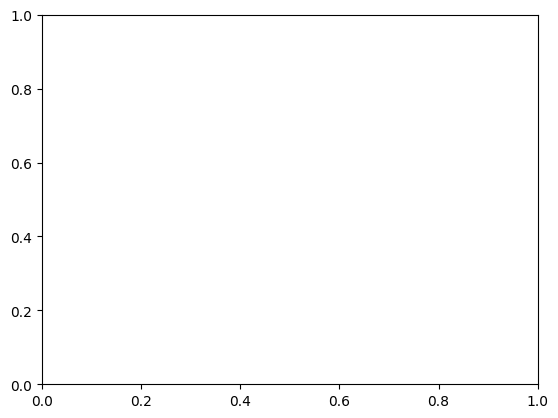

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
x=list(range(12))
for i in range(7):
    purchases = cum_reward[i]
    for j in range(len(purchases)):
        plt.plot(x,purchases)
        plt.xlabel("step")
        plt.ylabel("reward")